In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize']=(12,8)

In [2]:
def replace_string(data, column):
    k_columns = data[data[column].str.contains("K")]
    k_columns = k_columns.loc[k_columns[column]!='K']
    k_columns[column] = k_columns[column].str.strip('K').astype('float') * 1000
    m_columns = data[data[column].str.contains("M")]
    m_columns = m_columns.loc[m_columns[column]!='M']
    m_columns[column] = m_columns[column].str.strip('M').astype('float') * 1e6
    b_columns = data[data[column].str.contains("B")]
    b_columns = b_columns.loc[b_columns[column]!='B']
    b_columns[column] = b_columns[column].str.strip('B').astype('float') * 1e9
    columns = pd.concat([k_columns, m_columns, b_columns], axis=0)
    
    columns = columns.sort_index()
    
    return columns

In [3]:
%%time
storm_events = []
#init_path = '/Users/allanbellahsene/Desktop/THESIS/DATA/NCFEI/StormEvents_' #Mac_OS path
init_path = 'C:\\Users\\abellahsene\\Desktop\\THESIS\\DATA\\NCFEI\\StormEvents_' #Windows path
for years in list(np.arange(1962,2020)):
    path = init_path + str(years) + '.csv'
    storm_data = pd.read_csv(path, usecols=['BEGIN_DAY', 'MONTH_NAME', 'YEAR', 'STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'EVENT_TYPE', 'EPISODE_ID', 'EVENT_ID', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'])
    storm_data.index = pd.to_datetime(storm_data['BEGIN_DAY'].astype('str')+ '-' + storm_data['MONTH_NAME'] + '-' + storm_data.YEAR.astype('str'))
    storm_data = storm_data[['STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']] #keep only relevant columns
    storm_data.dropna(inplace=True) #drop missing values
    storm_data.sort_index(inplace=True) #sort data by date
    storm_events.append(storm_data)
    #print(years)
STORMS = pd.concat([storm_events[0], storm_events[1]], axis=0)
for i in range(2, len(storm_events)):
    STORMS = pd.concat([STORMS, storm_events[i]], axis=0)
print(STORMS.shape)
df = STORMS
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].astype('str')
df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].astype('str')
STORMS = df
STORMS = STORMS.loc[((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS =='0')) | ((STORMS.DAMAGE_PROPERTY=='0') & (STORMS.DAMAGE_CROPS !='0')) | ((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS !='0'))]
STORMS = STORMS.loc[STORMS.DAMAGE_PROPERTY!='K'] #delete rows that only contain "K"
STORMS = STORMS.loc[STORMS.DAMAGE_CROPS!='K']
STORMS = replace_string(STORMS, 'DAMAGE_PROPERTY')
STORMS = replace_string(STORMS, 'DAMAGE_CROPS')
STORMS['TOTAL_DAMAGES'] = STORMS['DAMAGE_PROPERTY'] + STORMS['DAMAGE_CROPS']
STORMS['Date'] = STORMS.index
STORMS = STORMS[['Date','STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'TOTAL_DAMAGES', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']]
df = STORMS.groupby(['STATE', 'Date']).agg({'TOTAL_DAMAGES':sum})
STORMS = STORMS.loc[STORMS['TOTAL_DAMAGES']!=0]
States = list(STORMS.STATE.unique())

(708372, 8)
Wall time: 16.5 s


In [4]:
v_cons = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Waterspout': 'Medium',
           'High Wind': 'High',
           'Flash Flood': 'Medium',
           'Flood': 'High',
           'Cold/Wind Chill': 'Medium',
           'Ice Storm': 'High',
           'Hail': 'High',
           'Lightning': 'High',
           'Drought': 'Medium',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'High',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'High',
           'Frost/Freeze': 'High',
           'Winter Weather': 'Medium',
           'Dense Fog': 'Medium',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'High',
           'Coastal Flood': 'High',
           'Heat': 'Medium',
           'Marine Thunderstorm Wind': 'Low',
           'Landslide': 'High',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'High',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Medium',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Medium',
           'Dust Devil': 'Medium',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Medium',
           'Rip Current': 'Low',
           'Sleet': 'Medium',
           'Marine Hurricane/Typhoon': 'Low',
           'Marine Lightning': 'Medium',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}

v_agr = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Waterspout': 'Low',
           'High Wind': 'High',
           'Flash Flood': 'High',
           'Flood': 'High',
           'Cold/Wind Chill': 'High',
           'Ice Storm': 'High',
           'Hail': 'High',
           'Lightning': 'Medium',
           'Drought': 'High',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'Medium',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'Medium',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'High',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Medium',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'Medium',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Low',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Hurricane (Typhoon)': 'High',
           'Marine Hurrican/Typhoon': 'Low',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}

v_agr = {'Tornado': 'Medium',
           'Winter Storm': 'Medium',
           'Thunderstorm Wind': 'Medium',
           'Waterspout': 'Low',
           'High Wind': 'Medium',
           'Flash Flood': 'Medium',
           'Flood': 'High',
           'Cold/Wind Chill': 'Medium',
           'Ice Storm': 'Medium',
           'Hail': 'Medium',
           'Lightning': 'Medium',
           'Drought': 'High',
           'Hurricane (Typhoon)': 'Medium',
           'Storm Surge/Tide': 'Medium',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'Medium',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'High',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Medium',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'Medium',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Low',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Hurricane (Typhoon)': 'High',
           'Marine Hurrican/Typhoon': 'Low',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}


v_energy = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Waterspout': 'High',
           'High Wind': 'High',
           'Flash Flood': 'High',
           'Flood': 'High',
           'Cold/Wind Chill': 'High',
           'Ice Storm': 'High',
           'Hail': 'Medium',
           'Lightning': 'High',
           'Drought': 'Medium',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'High',
           'Wildfire': 'Medium',
           'Heavy Rain': 'Medium',
           'Heavy Snow': 'Medium',
           'Blizzard': 'High',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'Medium',
           'Tropical Storm': 'Medium',
           'Dust Storm': 'Low',
           'Extreme Cold/Wind Chill': 'Low',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'Low',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Low',
           'Lake-Effect Snow': 'Low',
           'High Surf': 'Low',
           'Lakeshore Flood': 'Medium',
           'Tsunami': 'High',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Medium',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Medium',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Marine Hurricane/Typhoon': 'Medium',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}


In [5]:
STORMS['Vulnerability Energy'] = STORMS['EVENT_TYPE'].map(v_energy)
STORMS['Vulnerability Agriculture'] = STORMS['EVENT_TYPE'].map(v_agr)
STORMS['Vulnerability Construction'] = STORMS['EVENT_TYPE'].map(v_cons)

In [17]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
def climate_score(climate_data, start_year, end_year, state, sector):
    df = climate_data.copy()
    df = df.loc[(df.index>=start_year+'-01-01') & (df.index<=end_year+'-12-31') & (df.STATE==state)]
    if sector == 'All':
        df['Vulnerability'] = np.ones(len(df)).reshape(-1,1)
    else:
        df['Vulnerability'] = df['Vulnerability '+sector].map({'High': 1, 'Medium': 0.5, 'Low': 0})
    
    df.dropna(inplace=True)
    
    score = np.dot(np.array(df.TOTAL_DAMAGES).T, np.array(df.Vulnerability))
    
    return score

def climate_ranking(climate_data, start_year, end_year, sector):
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    score = []
    for states in list(climate_data.STATE.unique()):
        score.extend((states, climate_score(climate_data, start_year, end_year, states, sector)))
    score = np.array(score).reshape((int(len(score)/2), 2))
    ranking = pd.DataFrame(score, columns=['State', 'Climate Score Risk'])
    ranking['Climate Score Risk'] = ranking['Climate Score Risk'].astype('float')
    ranking.sort_values(by='Climate Score Risk', inplace=True, ascending=False)
    ranking.reset_index(inplace=True)
    ranking.drop(columns=['index'], inplace=True)
    
    ranking['Climate Score Risk'] = scaler.fit_transform(ranking['Climate Score Risk'].values.reshape(-1,1))
    ranking['Climate Score Risk'] = 1 - ranking['Climate Score Risk']
    
    return ranking

def financial_ranking(fin_data, start_year, end_year, sector):
    data = fin_data.loc[(fin_data.index>=start_year+'-01-01') & (fin_data.index<=end_year+'-12-31') & (fin_data.naics.astype('str').str.startswith(sector))]
    
    states = data.State.unique()
    av_roa = []
    for state in states:
        companies = data.conm.loc[data.State==state].unique()
        for comp in companies:
            ROA = data.ROA.loc[data.conm==comp].mean()
            av_roa.extend((state, ROA, comp))

    av_roa = np.array(av_roa).reshape(int(len(av_roa)/3), 3)
    av_roa = pd.DataFrame(av_roa, columns=['State', 'Average ROA', 'Company'])
    av_roa['Average ROA'] = av_roa['Average ROA'].astype('float')
    av_roa = pd.DataFrame(av_roa.groupby('State')['Average ROA'].mean())
    av_roa.sort_values('Average ROA', inplace=True)
    
    return av_roa

def plot_linear_regression(data, exo_var, endo_var):
    from sklearn.linear_model import LinearRegression
    Y = data[exo_var].values.reshape(-1,1)
    X = data[endo_var].values.reshape(-1,1)
    model = LinearRegression().fit(X,Y)
    Y_pred = model.predict(X)
    R_squared = model.score(X,Y)
    alpha, beta = [model.intercept_[0], model.coef_[0]]
    plt.scatter(X,Y)
    plt.plot(X,Y_pred, color='red')
    plt.xlabel(endo_var)
    plt.ylabel(exo_var)
    plt.legend(['y = ' + str(round(alpha,5)) + '+ ' + str(round(float(beta), 4)) + 'X'])
    plt.title('Linear Regression of ' + exo_var + ' against ' + endo_var + ', $R^2$ = ' + str(R_squared))
    
def display_results(fin_data, climate_data, start_year, end_year, sector_name, sector_naics):
    fin_ranking = financial_ranking(fin_data=fin_data, start_year=start_year, end_year=end_year, sector=sector_naics)
    climateranking = climate_ranking(climate_data=climate_data, start_year=start_year, end_year=end_year, sector=sector_name)
    climateranking.index = climateranking.State
    climateranking.drop(columns=['State'], inplace=True)
    ranking = fin_ranking.merge(climateranking, on='State', how='left')
    worst_clim_states = list(ranking['Climate Score Risk'].nsmallest(5).index)
    best_clim_states = list(ranking['Climate Score Risk'].nlargest(5).index)
    best_ROA = ranking['Average ROA'].loc[ranking.index.isin(best_clim_states)].mean()
    worst_ROA = ranking['Average ROA'].loc[ranking.index.isin(worst_clim_states)].mean()
    diff = best_ROA - worst_ROA
    worst_fin_states = list(ranking['Average ROA'].nsmallest(5).index)
    best_fin_states = list(ranking['Average ROA'].nlargest(5).index)
    best_clim_states = np.array(best_clim_states).reshape(-1,1)
    best_fin_states = np.array(best_fin_states).reshape(-1,1)
    best_states = np.concatenate((best_clim_states, best_fin_states), axis=1)
    best_states = pd.DataFrame(best_states, columns=['Top 5 Less Climate at Risk States', 'Top 5 Most Financially Performant States'])
    worst_clim_states = np.array(worst_clim_states).reshape(-1,1)
    worst_fin_states = np.array(worst_fin_states).reshape(-1,1)
    worst_states = np.concatenate((worst_clim_states, worst_fin_states), axis=1)
    worst_states = pd.DataFrame(worst_states, columns=['Top 5 Most Climate at Risk States', 'Top 5 Less Financially Performant States'])
    pearson_corr = ranking['Climate Score Risk'].corr(ranking['Average ROA'])
    spearman_corr = stats.spearmanr(ranking.iloc[:,0], ranking.iloc[:,1])[0]
    kendall_corr = stats.kendalltau(ranking.iloc[:,0], ranking.iloc[:,1])[0]
    corr_measures = pd.DataFrame([[pearson_corr], [spearman_corr], [kendall_corr]], [['Pearson Correlation', 'Spearman Correlation', 'Kendall Correlation']], columns=['Correlation Measure'])
    
    print('Sector: ' + str(sector_name), 'Ranking', ranking, 'Top 5 Best States', best_states, 'Top 5 Worst States', worst_states,
      'Average ROA of 5 less risky States: ' +str(best_ROA), 'Average ROA of 5 riskiest States: ' + str(worst_ROA),
      'Difference: ' + str(diff), 'Correlation measures: ', corr_measures, sep='\n\n')
    plot_linear_regression(ranking, 'Average ROA', 'Climate Score Risk')

In [12]:
#Financial fundamental data

#fundamentals = pd.read_csv('/Users/allanbellahsene/Desktop/THESIS/DATA/WHARTON_DATABASE/Funda_data.csv')
path = "C:\\Users\\abellahsene\\Desktop\\THESIS\\DATA\\WHARTON_DATABASE\\Funda_data.csv"
fundamentals = pd.read_csv(path)
fundamentals[['Date']] = fundamentals[['datadate']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
fundamentals.Date = pd.to_datetime(fundamentals.Date)
fin_data = fundamentals
#sector = '11'
#data = fin_data.loc[fin_data.naics.astype('str').str.startswith(sector)]
data = fin_data
data = data[['gvkey', 'fqtr', 'tic', 'conm', 'atq', 'niq', 'loc', 'state', 'naics', 'Date']]
data.index = data.Date
data = data.loc[data['loc'] == 'USA'] #keep only companies with headquarters in the US
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
data['State'] = data['state'].map(abbrev_us_state)
data.State = data.State.str.upper()
data['ROA'] = data['niq'] / data['atq']
data = data[['gvkey', 'naics','tic', 'conm', 'ROA','State']]
data.dropna(inplace=True)
data = data.loc[abs(data.ROA)<10]

Sector: Agriculture

Ranking

                Average ROA  Climate Score Risk
State                                          
FLORIDA           -1.005070            0.251503
TEXAS             -0.573137            0.000000
SOUTH CAROLINA    -0.382448            0.982877
CALIFORNIA        -0.182216            0.420206
ARIZONA           -0.177113            0.975913
OREGON            -0.095789            0.987517
INDIANA           -0.080167            0.960223
HAWAII            -0.036784            0.999003
NEW JERSEY        -0.032771            0.679424
PUERTO RICO       -0.025366            0.725169
NORTH CAROLINA    -0.008158            0.770963
DELAWARE          -0.007719            0.999169
NEW YORK          -0.007423            0.962299
ILLINOIS          -0.003826            0.923075
WISCONSIN          0.001105            0.956823
MISSOURI           0.001878            0.905731
MASSACHUSETTS      0.005899            0.989673
MISSISSIPPI        0.012797            0.751121
PENNSYLVAN

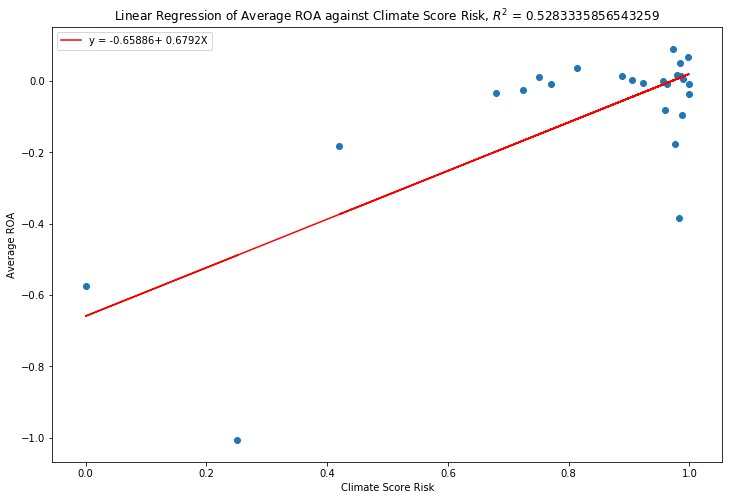

In [28]:
display_results(fin_data=data, climate_data=STORMS, start_year='1996', end_year='2019', sector_name='Agriculture', sector_naics='11')

Sector: Construction

Ranking

                Average ROA  Climate Score Risk
State                                          
NEW YORK          -0.263003            0.959156
CALIFORNIA        -0.159487            0.444787
COLORADO          -0.126855            0.945901
TEXAS             -0.067741            0.000000
ARIZONA           -0.056220            0.963602
NEW JERSEY        -0.050335            0.429925
FLORIDA           -0.048009            0.263245
UTAH              -0.035984            0.989974
IDAHO             -0.024306            0.981902
NEBRASKA          -0.024053            0.921007
CONNECTICUT       -0.019734            0.997129
MINNESOTA         -0.016587            0.973323
LOUISIANA         -0.013920            0.728622
PENNSYLVANIA      -0.008697            0.984103
WEST VIRGINIA     -0.008309            0.991043
HAWAII            -0.005925            0.998861
OKLAHOMA          -0.005198            0.899970
WASHINGTON        -0.003356            0.968440
MARYLAND 

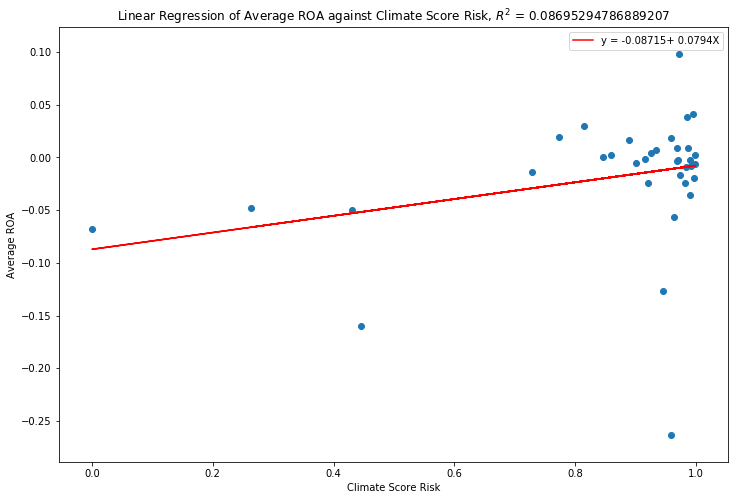

In [14]:
display_results(fin_data=data, climate_data=STORMS, start_year='1996', end_year='2019', sector_name='Construction', sector_naics='23')

Sector: All

Ranking

                Average ROA  Climate Score Risk
State                                          
UTAH              -0.339374            0.993306
FLORIDA           -0.249109            0.531135
WASHINGTON        -0.147215            0.980036
NEW YORK          -0.124469            0.967552
CONNECTICUT       -0.102561            0.998164
TEXAS             -0.079655            0.000000
COLORADO          -0.054442            0.965702
OREGON            -0.052633            0.991594
ARIZONA           -0.047000            0.976396
NEW JERSEY        -0.037300            0.640682
HAWAII            -0.029649            0.999088
OKLAHOMA          -0.026131            0.932201
VIRGINIA          -0.025690            0.978472
LOUISIANA         -0.023504            0.802347
MINNESOTA         -0.023327            0.980978
CALIFORNIA        -0.021713            0.635443
MASSACHUSETTS     -0.015218            0.991080
MARYLAND          -0.013252            0.993457
ILLINOIS          

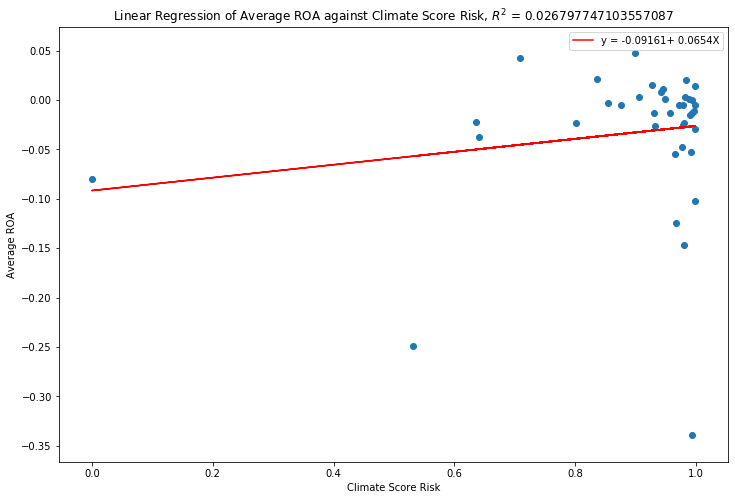

In [24]:
display_results(fin_data=data, climate_data=STORMS, start_year='1996', end_year='2019', sector_name='All', sector_naics='72')